In [2]:
import numpy as np 
import math 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,BatchNormalization,LeakyReLU,Activation
from tensorflow.keras.callbacks import EarlyStopping,Callback,ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
df = pd.read_csv('fer2013.csv')
df.head()


emotion                                             pixels     Usage
0        0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...  Training
1        0  151 150 147 155 148 133 111 140 170 174 182 15...  Training
2        2  231 212 156 164 174 138 161 173 182 200 106 38...  Training
3        4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...  Training
4        6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...  Training

In [4]:
df.emotion.unique()

array([0, 2, 4, 6, 3, 5, 1], dtype=int64)

In [ ]:
emotion_label_to_text = {0: "Angry",
                          1: "Disgust", 
                          2: "Fear",
                            3: "Happy",
                              4: "Sad", 
                              5: "Surprise",
                                6: "Neutral"}

In [6]:
df.emotion.value_counts()

emotion
3    8989
6    6198
4    6077
2    5121
0    4953
5    4002
1     547
Name: count, dtype: int64

<Axes: ylabel='count'>

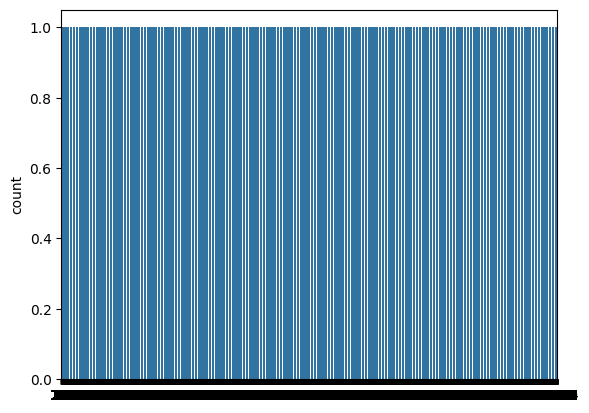

In [7]:
sns.countplot(df.emotion)

In [9]:
math.sqrt(len(df.pixels[0].split(" ")))

48.0

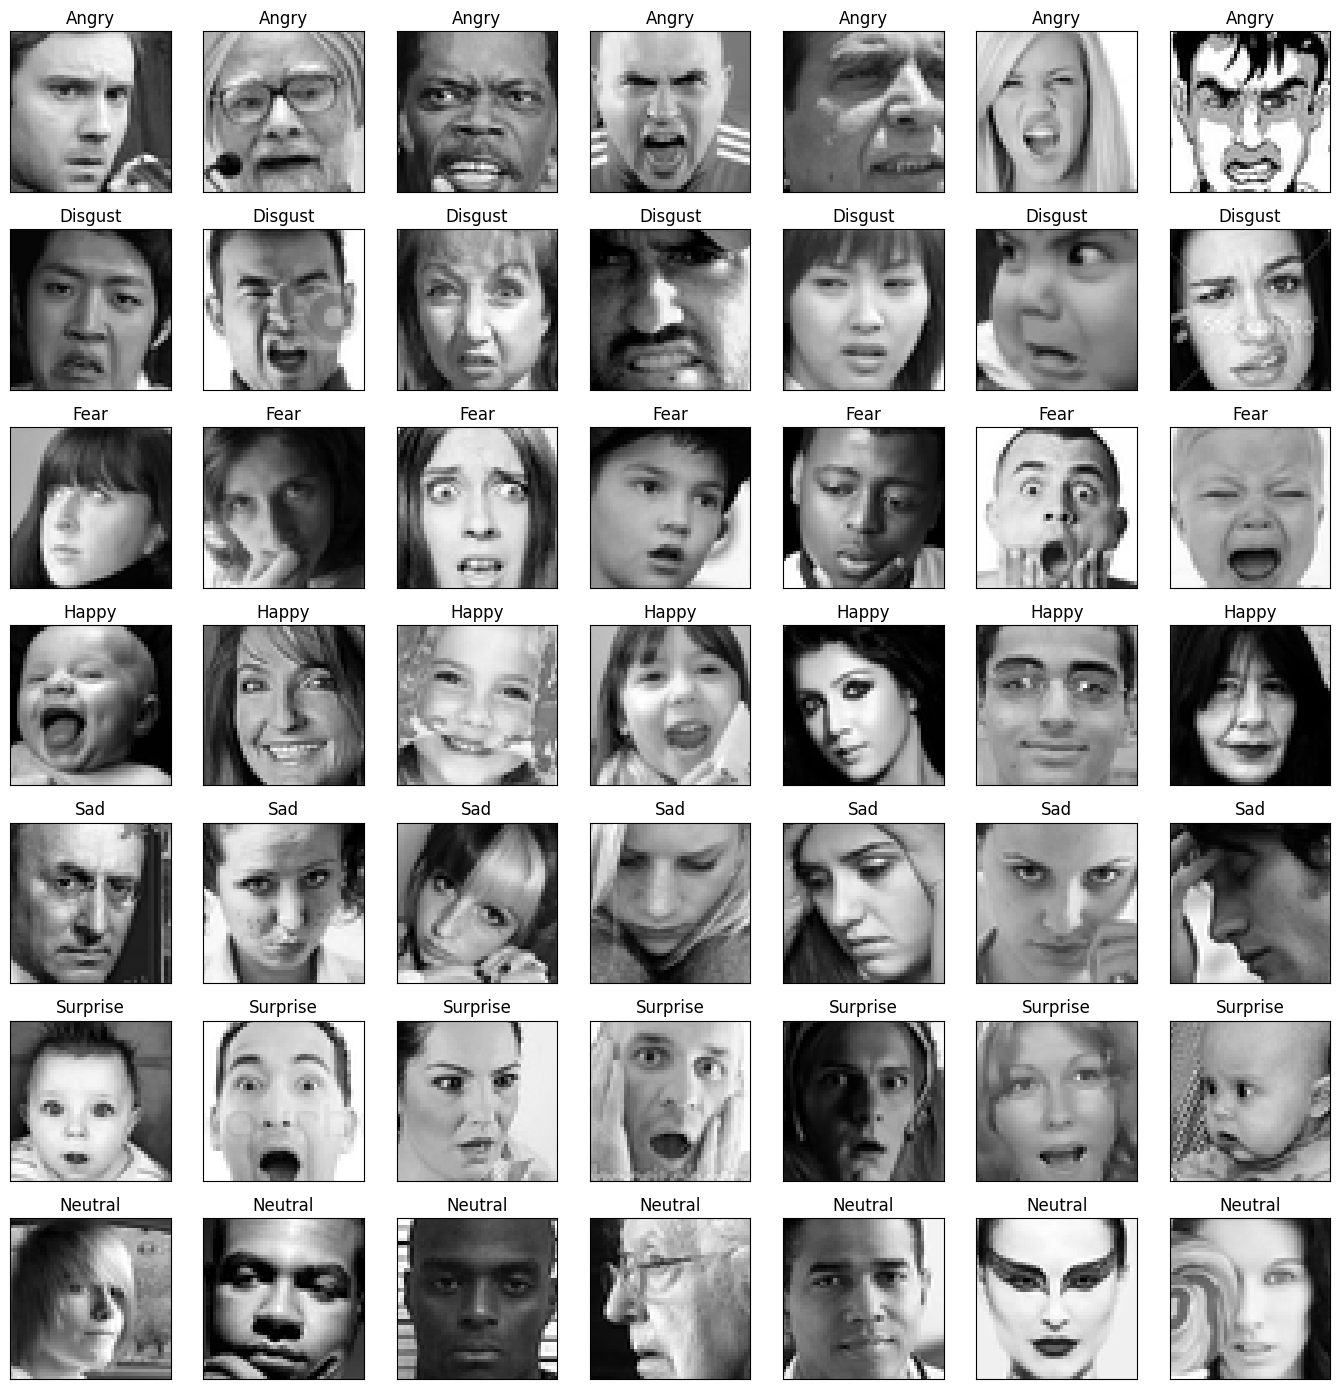

In [10]:
fig = plt.figure(1,(14,14))

k = 0 
for label in sorted(df.emotion.unique()):
    for j in range(7):
        px = df[df.emotion==label].pixels.iloc[k]
        px = np.array(px.split(" ")).reshape(48,48).astype('float32')

        k+=1
        ax = plt.subplot(7,7,k)
        ax.imshow(px,cmap='gray')
        ax.set_yticks([])
        ax.set_xticks([])
        ax.set_title(emotion_label_to_text[label])
        plt.tight_layout()

In [11]:
Interested_labels = [3,4,6]

In [12]:
df = df[df.emotion.isin(Interested_labels)]
df.shape

(21264, 3)

In [13]:
##data compatible for our model 
img_array = df.pixels.apply(lambda x: np.array(x.split(" ")).reshape(48,48).astype('float32'))
img_array = np.stack(img_array,axis=0)

In [14]:
img_array.shape

(21264, 48, 48)

In [15]:
le=LabelEncoder()
img_lables = le.fit_transform(df.emotion)
img_lables =to_categorical(img_lables)
img_lables.shape

(21264, 3)

In [16]:
le_name_mapping = dict(zip(le.classes_,le.transform(le.classes_)))
le_name_mapping

{3: 0, 4: 1, 6: 2}

In [17]:
##split data into train and val
x_train , x_val, y_train, y_val = train_test_split(
    img_array,img_lables,
    test_size=0.1,
    random_state=42,
    shuffle= True,
    stratify=img_lables)

In [18]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((19137, 48, 48), (19137, 3), (2127, 48, 48), (2127, 3))

In [ ]:
# del df
# del img_array
# del img_lables

In [20]:
x_train = x_train.reshape(-1, 48, 48, 1)


In [21]:
img_width = x_train.shape[1]
img_height = x_train.shape[2]
img_depth= x_train.shape[3]
num_classes = y_train.shape[1]

In [22]:
##normalise data
x_train = x_train/255
x_val = x_val/255

In [ ]:
##def ccn arch
def build_net(optim):
    net = Sequential(name = "DCNN") 
    net.add(p
        Conv2D(
            filters = 64,
            kernel_size = (5,5),
            input_shape = (img_width, img_height, img_depth),
            padding = "same",
            activation = "elu",
            kernel_initializer = "he_normal",
            name = "conv2d_1"
        )
    )
    net.add(BatchNormalization(
        name = "batch_normalization_1"))
    net.add(
        Conv2D(
            filters = 64 ,
            kernel_size = (5,5),
            activation = "elu",
            padding = "same",
            kernel_initializer = "he_normal",
            name = "conv2d_2"
        )
    )
    net.add(BatchNormalization(
        name = "batch_normalization_2"))
    net.add(
        MaxPooling2D(
            pool_size = (2,2),
            name = "max_pooling2d_1"
        )
    )
    net.add(Dropout(0.4,name = "droput_1"))
    net.add(
        Conv2D(
            filters = 128 ,
            kernel_size = (3,3),
            activation = "elu",
            padding = "same",
            kernel_initializer = "he_normal",
            name = "conv2d_3"
        )
    )
    net.add(BatchNormalization(
        name = "batch_normalization_3"))
    net.add(
        Conv2D(
            filters = 128 ,
            kernel_size = (3,3),
            activation = "elu",
            padding = "same",
            kernel_initializer = "he_normal",
            name = "conv2d_4"
        )
    )
    net.add(BatchNormalization(
        name = "batch_normalization_4"))
    net.add(
        MaxPooling2D(
            pool_size = (2,2),
            name = "max_pooling2d_2"
        )
    )
    net.add(Dropout(0.4,name = "droput_2"))

    net.add(
        Conv2D(
            filters = 256 ,
            kernel_size = (3,3),
            activation = "elu",
            padding = "same",
            kernel_initializer = "he_normal",
            name = "conv2d_5"
        )
    )
    net.add(BatchNormalization(
        name = "batch_normalization_5"))
    net.add(
        Conv2D(
            filters = 256 ,
            kernel_size = (3,3),
            activation = "elu",
            padding = "same",
            kernel_initializer = "he_normal",
            name = "conv2d_6"
        )
    )
    net.add(BatchNormalization(
        name = "batch_normalization_6"))
    net.add(
        MaxPooling2D(
            pool_size = (2,2),
            name = "max_pooling2d_3"
        )
    )
    net.add(Dropout(0.5,name = "droput_3"))

    net.add(Flatten(name = "flatten"))
    net.add(
        Dense(
            128,
            activation = "elu",
            kernel_initializer = "he_normal",
            name = "dense_1"
        )
    )
    net.add(BatchNormalization(
        name = "batch_normalization_7"))
    net.add(Dropout(0.6,name = "droput_4"))
    net.add(
        Dense(num_classes,
            activation = "softmax",
            name = "out_layer"
        )
    )

    net.compile(
        loss = "categorical_crossentropy",
        optimizer = optim,
        metrics = ["accuracy"]
    )
    net.summary()
    return net


   

In [25]:
##callbacks 
early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    min_delta = 0.00005,
    patience = 11,
    verbose = 1,
    restore_best_weights = True
)
reduce_lr = ReduceLROnPlateau(
    monitor = "val_accuracy",
    factor = 0.5,
    patience = 7,
    min_lr = 1e-7,
    verbose = 1
)

callbacks = [early_stopping,reduce_lr]

In [26]:
##imagegen -- data in hand is less as compared to task 
train_datagen = ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.15,
    height_shift_range = 0.15,
    shear_range = 0.15,
    zoom_range = 0.15,
    horizontal_flip = True,
 
)
train_datagen.fit(x_train)

In [29]:
batch_size = 32
epochs = 100
optims = [
    optimizers.Nadam(learning_rate = 0.001,
                     beta_1 = 0.9,
                     beta_2 = 0.999,
                     epsilon = 1e-07,
                     name = "Nadam"
                     ),
    optimizers.Adam(learning_rate = 0.001)
]

In [33]:
model = build_net(optims[1])
history = model.fit(
    train_datagen.flow(x_train,y_train,batch_size = batch_size),
    validation_data = (x_val,y_val),
    steps_per_epoch = len(x_train) // batch_size,
    epochs = epochs,
    callbacks = callbacks,
    
)

Model: "DCNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 48, 48, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 48, 48, 64)     │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ droput_1 (Dropout)              │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ droput_2 (Dropout)              │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ droput_3 (Dropout)              │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │     1,179,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 2,395,075 (9.14 MB)

 Trainable params: 2,393,027 (9.13 MB)

 Non-trainable params: 2,048 (8.00 KB)

Epoch 1/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 358s 590ms/step - accuracy: 0.3742 - loss: 1.6327 - val_accuracy: 0.4998 - val_loss: 0.9928 - learning_rate: 0.0010
Epoch 2/100
  1/598 ━━━━━━━━━━━━━━━━━━━━ 5:33 558ms/step - accuracy: 0.3750 - loss: 1.2281

c:\Users\jaikr\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.3750 - loss: 1.2281 - val_accuracy: 0.4969 - val_loss: 0.9917 - learning_rate: 0.0010
Epoch 3/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 361s 603ms/step - accuracy: 0.4676 - loss: 1.0476 - val_accuracy: 0.6060 - val_loss: 0.8481 - learning_rate: 0.0010
Epoch 4/100
598/598 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.5625 - loss: 0.8941 - val_accuracy: 0.6046 - val_loss: 0.8501 - learning_rate: 0.0010
Epoch 5/100
410/598 ━━━━━━━━━━━━━━━━━━━━ 1:50 587ms/step - accuracy: 0.5539 - loss: 0.9254

KeyboardInterrupt: 

In [ ]:
##model save and load
model_yaml = model.to_yaml()
with open ("model.yaml","w") as yaml_file:
    yaml_file.write(model_yaml)

model.save("model.h5")

In [ ]:
##graph 
sns.set()
fig = plt.subplot(1,2,1)

ax = plt.subplot(1,2,1)
sns.lineplot(history.epoch , history.history["accuracy"],label = "train")
sns.lineplot(history.epoch,history.history["val_accuracy"],label = "valid")
plt.title("Accuracy")
plt.tight_layout()

ax = plt.subplot(1,2,2)
sns.lineplot(history.epoch , history.history["loss"],label = "train")
sns.lineplot(history.epoch,history.history["val_loss"],label = "valid")
plt.title("Loss")
plt.tight_layout()



NameError: name 'sns' is not defined